In [1]:
#Importing important libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Reading dataset
df_accident = pd.read_csv('Accidents.csv')

### Defining functions

In [3]:
def analysis(df,condition):
    """
    function to calculate accident count based on dataframe and condition
    
    Args:
        df (Dataframe): The dataframe to count
        condition: Condition to be implemented
    
    Returns:
        Count of occurance of the condition
    """
    
    count=0
    for i in df:
        if i==condition:
            count=count+1
    return count

In [4]:
def plot_lineGraph(X,Y,xlabel,ylabel,title):
    """
    function to plot line graph
    
    Args:
        X: X value to be plotted
        Y: Y value to be plotted
        xlabel: string to be displayed on x-axis
        ylabel: string to be displayed on y-axis
        title: title of the line graph
    
    Returns:
        Null
    """
        
    plt.figure(figsize=(10,6))
    plt.plot(X,Y)
    plt.xticks(rotation=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [5]:
def plot_pieChart(Count,Label,Explode,ColorList):
    """
    function to plot pie char
    
    Args:
        Count: count to be plotted in pie chart
        Label: Labels of each count
        Explode: Explode values of each pie
        ColorList: List of Colors for each pie
    
    Returns:
        Null
    """
        
    plt.figure(figsize=(10,8))
    plt.pie(Count, labels =Label,explode=Explode, colors=ColorList, autopct='%1.1f%%')

In [6]:
def plot_table(Text, Labels, Columns):
    """
    function to plot table
    
    Args:
        Text: Row values
        Labels: Index values
        Columns: List of column names of the table
    
    Returns:
        Null
    """
        
    plt.table(cellText=Text, rowLabels=Labels, colLabels=Columns, cellLoc = 'center', rowLoc = 'center', loc='top')
    plt.axis('off')

In [7]:
def plot_barGraph(X,Y,xlabel,ylabel,title):
    """
    function to plot bar graph
    
    Args:
        X: X value to be plotted
        Y: Y value to be plotted
        xlabel: string to be displayed on x-axis
        ylabel: string to be displayed on y-axis
        title: title of the bar graph
    
    Returns:
        Null
    """
        
    plt.figure(figsize=(10,6))
    plt.bar(X,Y)
    plt.xticks(rotation=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [8]:
def explore_dataframe(df):
    """
    function to explore dataframe
    
    Args:
        df: dataframe
    
    Returns:
        Null
    """
       
    print("The top 5 Rows:\n",df.head(),"\n")
    print("Stats of df:\n",df.describe(),"\n")
    print("Dataset info:\n",df.info(),"\n")
    print(df.describe(include="all"),"\n")
    print("Shape of Dataframe:\n",df.shape,"\n")
    print("Columns in Datafram:\n",df.columns,"\n")

### Exploring dataset

In [9]:
explore_dataframe(df_accident)

The top 5 Rows:
    accident_index  accident_year accident_severity  number_of_vehicles  \
0    2.020000e+12           2020            Slight                   1   
1    2.020000e+12           2020            Slight                   1   
2    2.020000e+12           2020            Slight                   1   
3    2.020000e+12           2020           Serious                   1   
4    2.020000e+12           2020            Slight                   1   

   number_of_casualties       date     Month day_of_week  \
0                     1   2/4/2020  February     Tuesday   
1                     2  4/27/2020     April      Monday   
2                     1   1/1/2020   January   Wednesday   
3                     1   1/1/2020   January   Wednesday   
4                     2   1/1/2020   January   Wednesday   

  local_authority_district           road_type       light_conditions  \
0               Wandsworth  Single carriageway               Daylight   
1                  Lambeth  Sin

### Defining dictionary to store accident count by month

In [10]:
accident_month= {"Month":[],"Accident_count":[]}

In [11]:
# defining list for months of the year to iterate in a loop
months=["January","February","March","April","May","June","July","August","September","October","November","December"]

### Calling analysis function to calculate count of accidents by month

In [12]:
for i in months:
    accident_month["Month"].append(i)
    accident_month["Accident_count"].append(analysis(df_accident['Month'],i))

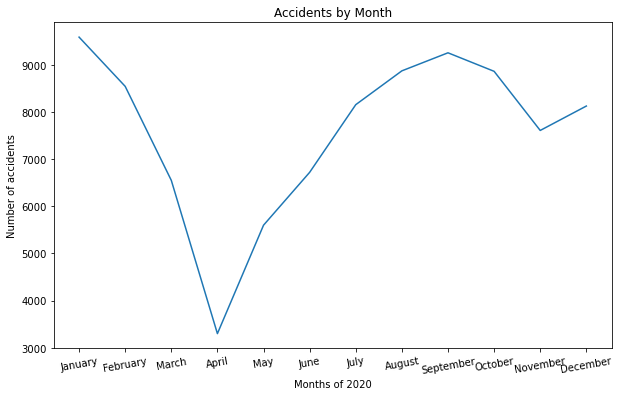

In [13]:
plot_lineGraph(accident_month['Month'],
               accident_month['Accident_count'],'Months of 2020','Number of accidents','Accidents by Month')

### Accidents by Severity

In [14]:
# Defining dictionary to store Accidents count by Severity
accident_sev= {"Accident_Severity":[],"Accident_count":[],"myexplode":[]}

In [15]:
# Appending dictionary by calling analysis function
accident_sev["Accident_Severity"].append('Fatal')
accident_sev["Accident_count"].append(analysis(df_accident['accident_severity'],'Fatal'))
accident_sev["myexplode"].append(0.2)

accident_sev["Accident_Severity"].append('Slight')
accident_sev["Accident_count"].append(analysis(df_accident['accident_severity'],'Slight'))
accident_sev["myexplode"].append(0)

accident_sev["Accident_Severity"].append('Serious')
accident_sev["Accident_count"].append(analysis(df_accident['accident_severity'],'Serious'))
accident_sev["myexplode"].append(0)

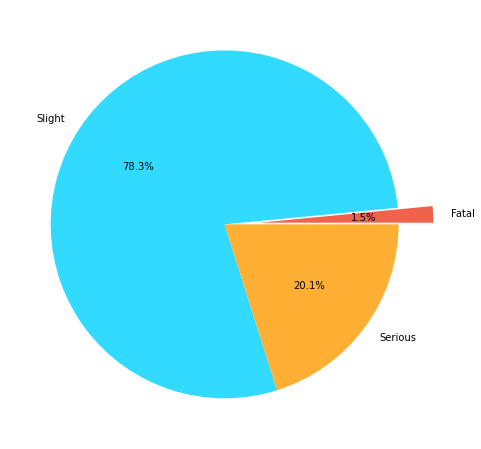

In [16]:
# plotting pie chart for percentage of accidents by severity
plot_pieChart(accident_sev['Accident_count'],accident_sev['Accident_Severity'],
              accident_sev["myexplode"],['#EF634D','#33DAFF','#FFAF33'])

### Accidents by Road Surface Condition

In [17]:
# Defining dictionary to store Accidents count by Road Surface Condition
accident_road= {"Road_Condition":[],"Accident_count":[]}

In [18]:
# Appending dictionary by calling analysis function
accident_road["Road_Condition"].append('Dry')
accident_road["Accident_count"].append(analysis(df_accident['road_surface_conditions'],'Dry'))

accident_road["Road_Condition"].append('Flood over 3cm. deep')
accident_road["Accident_count"].append(analysis(df_accident['road_surface_conditions'],'Flood over 3cm. deep'))

accident_road["Road_Condition"].append('Frost or ice')
accident_road["Accident_count"].append(analysis(df_accident['road_surface_conditions'],'Frost or ice'))

accident_road["Road_Condition"].append('Snow')
accident_road["Accident_count"].append(analysis(df_accident['road_surface_conditions'],'Snow'))

accident_road["Road_Condition"].append('Wet or damp')
accident_road["Accident_count"].append(analysis(df_accident['road_surface_conditions'],'Wet or damp'))

In [19]:
df_AccRoad = pd.DataFrame.from_dict(accident_road)

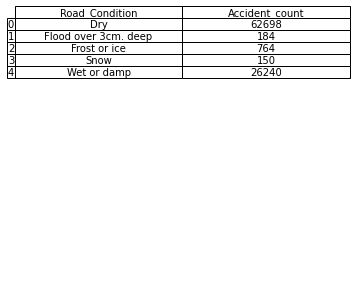

In [20]:
plot_table(df_AccRoad.values, df_AccRoad.index, df_AccRoad.columns)

### Accidents by Light conditions

In [21]:
# Defining dictionary to store Accidents count by Light Condition
accident_light= {"light_conditions":[],"Accident_count":[]}

In [22]:
# Appending dictionary by calling analysis function
accident_light["light_conditions"].append('Darkness - lighting unknown')
accident_light["Accident_count"].append(analysis(df_accident['light_conditions'],'Darkness - lighting unknown'))

accident_light["light_conditions"].append('Darkness - lights lit')
accident_light["Accident_count"].append(analysis(df_accident['light_conditions'],'Darkness - lights lit'))

accident_light["light_conditions"].append('Darkness - lights unlit')
accident_light["Accident_count"].append(analysis(df_accident['light_conditions'],'Darkness - lights unlit'))

accident_light["light_conditions"].append('Darkness - no lighting')
accident_light["Accident_count"].append(analysis(df_accident['light_conditions'],'Darkness - no lighting'))

accident_light["light_conditions"].append('Daylight')
accident_light["Accident_count"].append(analysis(df_accident['light_conditions'],'Daylight'))

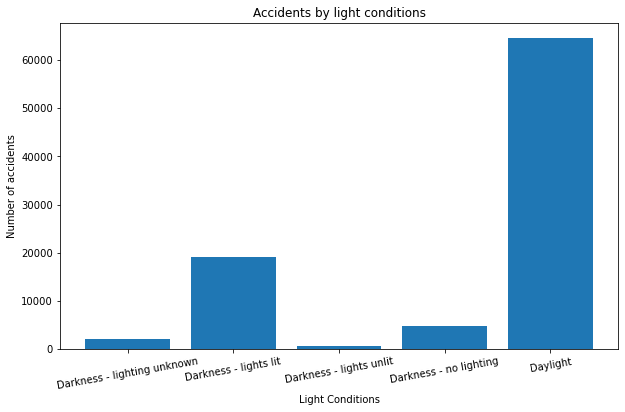

In [23]:
plot_barGraph(accident_light['light_conditions'], accident_light['Accident_count'], 'Light Conditions', 
              'Number of accidents', 'Accidents by light conditions')